In [4]:
# IMPORT PACKAGES
from em_examples.Base import widgetify
import em_examples.InductionLoop as IND
from ipywidgets import interact, FloatSlider, FloatText

## Parameter Descriptions

<img style="float: right; width: 500px" src="https://github.com/geoscixyz/em_apps/blob/master/images/InductionLoop.png?raw=true">

Below are the adjustable parameters for widgets within this notebook:

* $I_p$: Transmitter current amplitude [A]
* $a_{Tx}$: Transmitter loop radius [m]
* $a_{Rx}$: Receiver loop radius [m]
* $x_{Rx}$: Receiver x position [m]
* $z_{Rx}$: Receiver z position [m]
* $\theta$: Receiver normal vector relative to vertical [degrees]
* $R$: Resistance of receiver loop [$\Omega$]
* $L$: Inductance of receiver loop [H]
* $f$: Specific frequency [Hz]
* $t$: Specific time [s]

## Background Theory: Induced Currents due to a Harmonic Primary Signal

Consider the case in the image above, where a circular loop of wire ($Tx$) caries a harmonic current $I_p (\omega)$. According to the Biot-Savart law, this produces a harmonic primary magnetic field. The harmonic nature of the corresponding magnetic flux which passes through the receiver coil ($Rx$) generates an induced secondary current $I_s (\omega)$, which depends on the coil's resistance ($R$) and inductance ($L$). Here, we will provided final analytic results associated with the app below. Full derivations can be found at the bottom of the page.

### Frequency Response

The frequency response which characterizes the induced currents in $Rx$ is given by:

\begin{equation}
I_s (\omega) = - \frac{i \omega  A \beta_n}{R + i \omega L} I_p(\omega)
\end{equation}

where $A$ is the area of $Rx$ and $\beta$ contains the geometric information pertaining to the problem. The induced current has both in-phase and quadrature components. These are given by:

\begin{align}
I_{Re} (\omega) &= - \frac{i \omega A \beta_n R}{R^2 + (\omega L)^2} I_p(\omega) \\
I_{Im} (\omega) &= - \frac{ \omega^2 A \beta_n L}{R^2 + (\omega L)^2} I_p(\omega)
\end{align}

### Time-Harmonic Response

In the time domain, let us consider a time-harmonic primary current of the form $I_p(t) = I_0 \textrm{cos}(\omega t)$. In this case, the induced currents within $Rx$ are given by:

\begin{equation}
I_s (t) = - \Bigg [ \frac{\omega I_0 A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \, \textrm{cos} (\omega t -\phi) \;\;\;\;\; \textrm{where} \;\;\;\;\; \phi = \textrm{tan}^{-1} \Bigg ( \frac{\omega L}{R} \Bigg ) \, \in \, [\pi/2, \pi ]
\end{equation}

The phase-lag between the primary and secondary currents is represented by $\phi$. As a result, there are both in-phase and quadrature components of the induced current, which are given by:
\begin{align}
\textrm{In phase:} \, I_s (t) &= - \Bigg [ \frac{\omega I_0 A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \textrm{cos} \phi \, \textrm{cos} (\omega t) \\
\textrm{Quadrature:} \, I_s (t) &= - \Bigg [ \frac{\omega I_0 A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \textrm{sin} \phi \, \textrm{sin} (\omega t)
\end{align} 

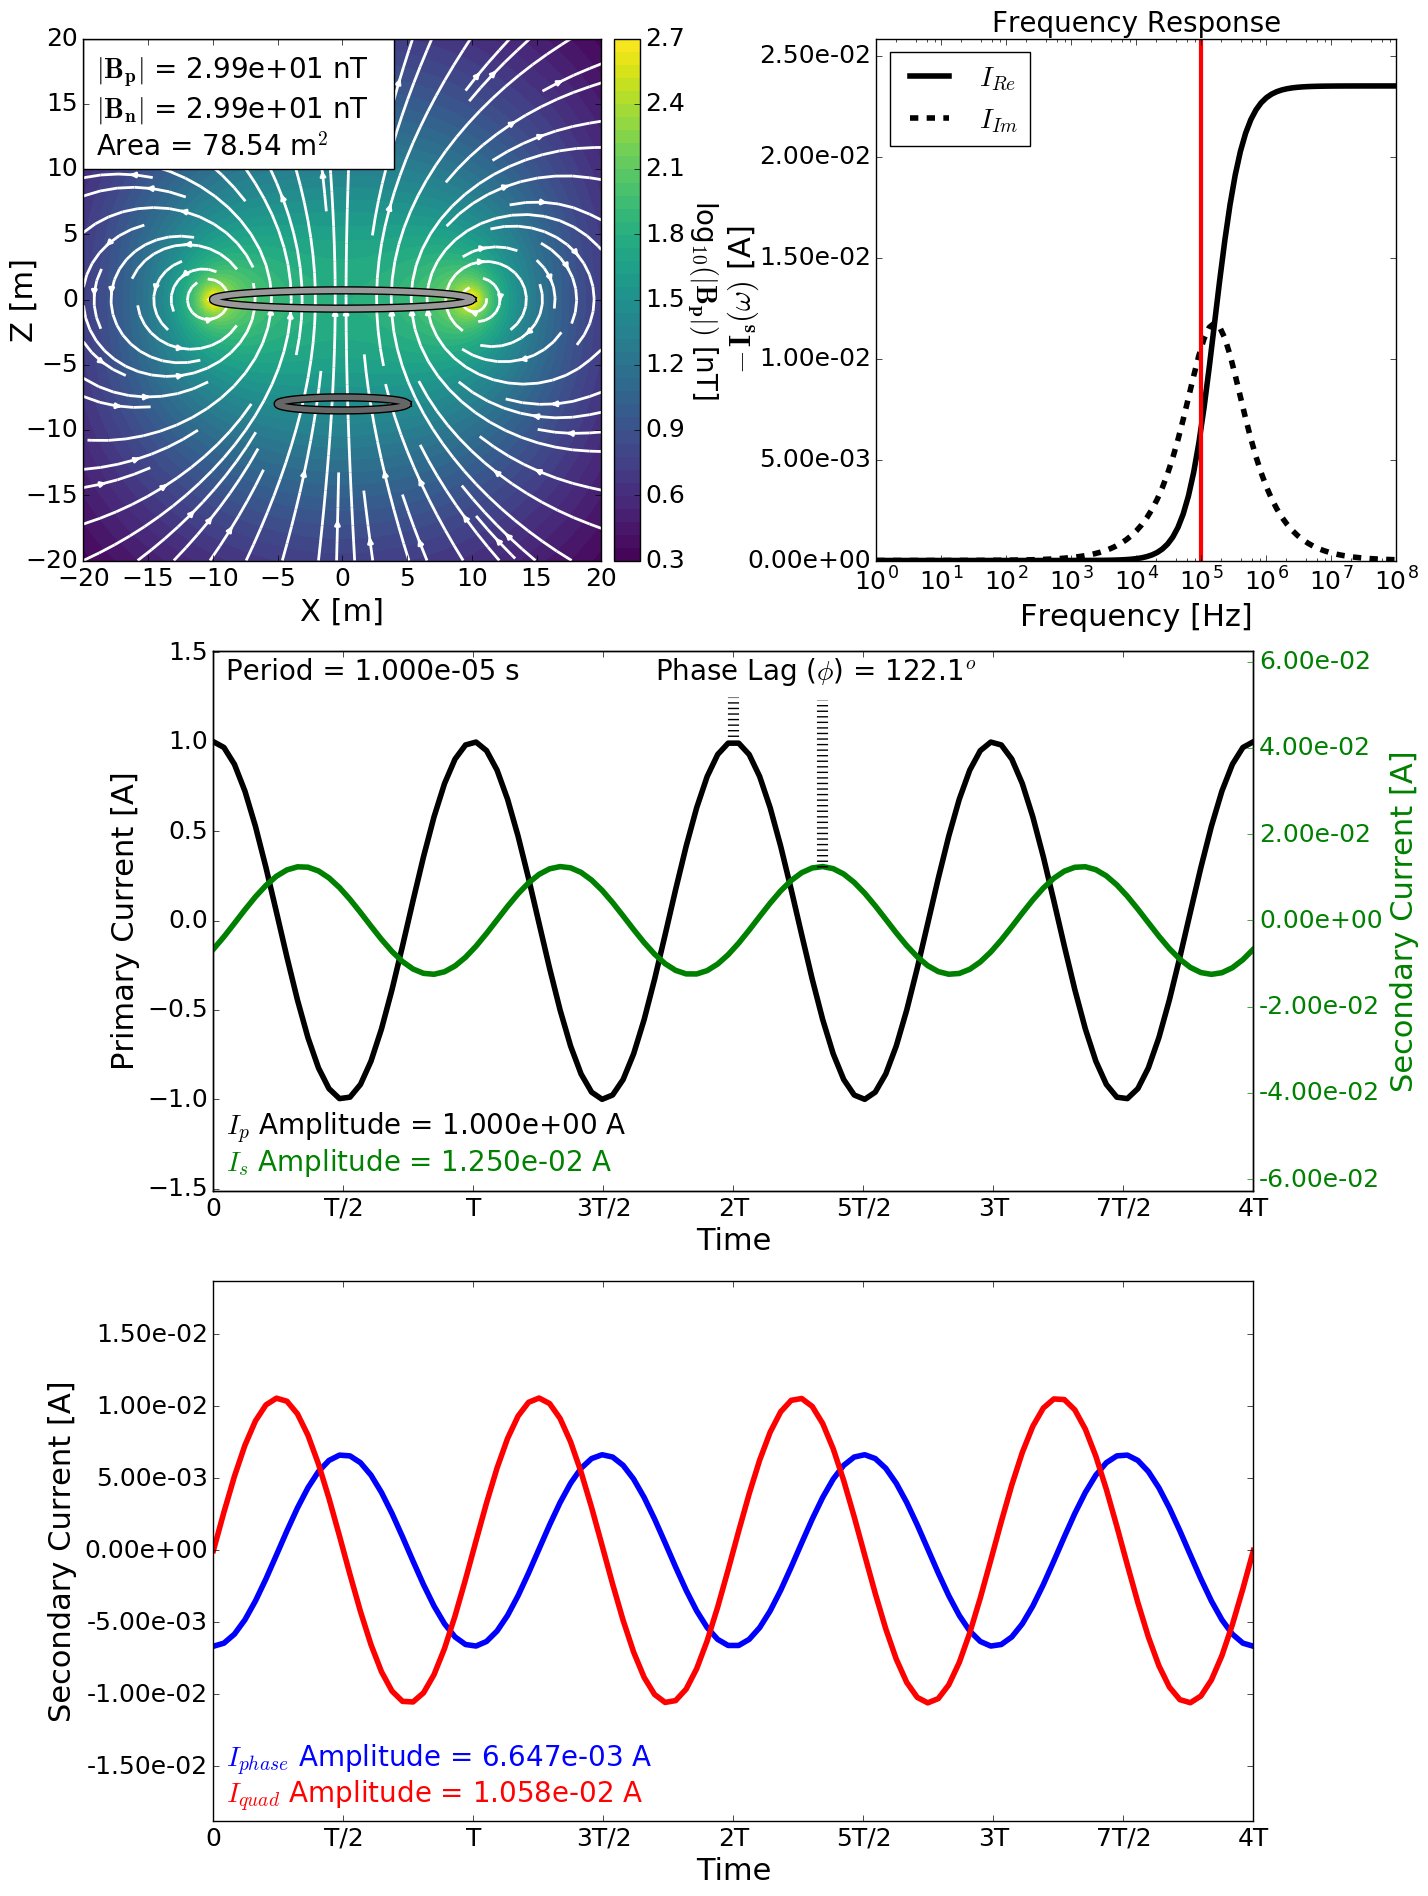

In [5]:
# RUN FREQUENCY DOMAIN WIDGET
widgetify(IND.fcn_FDEM_Widget,I=FloatSlider(min=1, max=10., value=1., step=1., continuous_update=False, description = "$I_0$"),\
                        a1=FloatSlider(min=1., max=20., value=10., step=1., continuous_update=False, description = "$a_{Tx}$"),\
                        a2=FloatSlider(min=1., max=20.,value=5.,step=1.,continuous_update=False,description = "$a_{Rx}$"),\
                        xRx=FloatSlider(min=-15., max=15., value=0., step=1., continuous_update=False, description = "$x_{Rx}$"),\
                        zRx=FloatSlider(min=-15., max=15., value=-8., step=1., continuous_update=False, description = "$z_{Rx}$"),\
                        azm=FloatSlider(min=-90., max=90., value=0., step=10., continuous_update=False, description = "$\\theta$"),\
                        logR=FloatSlider(min=0., max=6., value=2., step=1., continuous_update=False, description = "$log_{10}(R)$"),\
                        logL=FloatSlider(min=-7., max=-2., value=-4., step=1., continuous_update=False, description = "$log_{10}(L)$"),\
                        logf=FloatSlider(min=0., max=8., value=5., step=1., continuous_update=False, description = "$log_{10}(f)$"))
    
    

## Supporting Derivation for the Frequency Response

Consider a transmitter loop which carries a harmonic primary current $I_p(\omega)$. According to the Biot-Savart law, this results in a primary magnetic field:
\begin{equation}
\mathbf{B_p} (\mathbf{r},\omega) = \boldsymbol{\beta} \, I_p(\omega)  \;\;\;\; \textrm{where} \;\;\;\;\; \boldsymbol{\beta} = \frac{\mu_0}{4 \pi} \int_C \frac{d \mathbf{l} \times \mathbf{r'}}{|\mathbf{r'}|^2}
\end{equation}
where $\boldsymbol{\beta}$ contains the problem geometry. Assume the magnetic field is homogeneous through the receiver loop. The primary field generates an EMF within the receiver loop equal to:
\begin{equation}
EMF = - i\omega \Phi \;\;\;\;\; \textrm{where} \;\;\;\;\; \Phi =  A \beta_n I_p(\omega)
\end{equation}
where $A$ is the area of the receiver loop and $\beta_n$ is the component of $\boldsymbol{\beta}$ along $\hat n$. The EMF induces a secondary current $I_s(\omega)$ within the receiver loop. The secondary current is defined by the following expression:
\begin{equation}
V = - i \omega  A \beta_n I_p (\omega) =  \big (R + i\omega L \big )I_s(\omega)
\end{equation}
Rearranging this expression to solve for the secondary current we obtain
\begin{equation}
I_s (\omega) = - \frac{i \omega  A \beta_n}{R + i \omega L} I_p(\omega)
\end{equation}
The secondary current has both real and imaginary components. These are given by:
\begin{equation}
I_{Re} (\omega) = - \frac{i \omega A \beta_n R}{R^2 + (\omega L)^2} I_p(\omega)
\end{equation}
and
\begin{equation}
I_{Im} (\omega) = - \frac{ \omega^2 A \beta_n L}{R^2 + (\omega L)^2} I_p(\omega)
\end{equation}

## Supporting Derivation for the Time-Harmonic Response

Consider a transmitter loop which carries a harmonic primary current of the form:
\begin{equation}
I_p(t) = I_0 \textrm{cos} (\omega t)
\end{equation}
According to the Biot-Savart law, this results in a primary magnetic field:
\begin{equation}
\mathbf{B_p} (\mathbf{r},t) =  \boldsymbol{\beta} \, I_0 \, \textrm{cos} (\omega t)  \;\;\;\; \textrm{where} \;\;\;\;\; \boldsymbol{\beta} = \frac{\mu_0}{4 \pi} \int_C \frac{d \mathbf{l} \times \mathbf{r'}}{|\mathbf{r'}|^2}
\end{equation}
where $\boldsymbol{\beta}$ contains the problem geometry. If the magnetic field is homogeneous through the receiver loop, the primary field generates an EMF within the receiver loop equal to:
\begin{equation}
EMF = - \frac{\partial \Phi}{\partial t} \;\;\;\;\; \textrm{where} \;\;\;\;\; \Phi = A\hat n \cdot \mathbf{B_p} = I_0 A \beta_n \, \textrm{cos} (\omega t)
\end{equation}
where $A$ is the area of the receiver loop and $\beta_n$ is the component of $\boldsymbol{\beta}$ along $\hat n$. The EMF induces a secondary current $I_s$ within the receiver loop. The secondary current is defined by the following ODE:
\begin{equation}
V = \omega I_0 A \beta_n \, \textrm{sin} (\omega t) = I_s R + L \frac{dI_s}{dt}
\end{equation}
The ODE has a solution of the form:
\begin{equation}
I_s (t) = \alpha \, \textrm{cos} (\omega t - \phi)
\end{equation}
where $\alpha$ is the amplitude of the secondary current and $\phi$ is the phase lag. By solving the ODE, the secondary current induced in the receiver loop is given by:
\begin{equation}
I_s (t) = - \Bigg [ \frac{\omega I_0 A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \, \textrm{cos} (\omega t -\phi) \;\;\;\;\; \textrm{where} \;\;\;\;\; \phi = \textrm{tan}^{-1} \Bigg ( \frac{\omega L}{R} \Bigg ) \, \in \, [\pi/2, \pi ]
\end{equation}
The secondary current has both in-phase and quadrature components, these are given by:
\begin{equation}
\textrm{In phase:} \, I_s (t) = - \Bigg [ \frac{\omega I_0 A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \textrm{cos} \phi \, \textrm{cos} (\omega t)
\end{equation}
and
\begin{equation}
\textrm{Quadrature:} \, I_s (t) = - \Bigg [ \frac{\omega I_0 A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \textrm{sin} \phi \, \textrm{sin} (\omega t)
\end{equation}